In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Data

In [2]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [4]:
del chicago_df_1
del chicago_df_2
del chicago_df_3

In [32]:
chicago_df.shape

(6017767, 8)

Explore the data

In [6]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


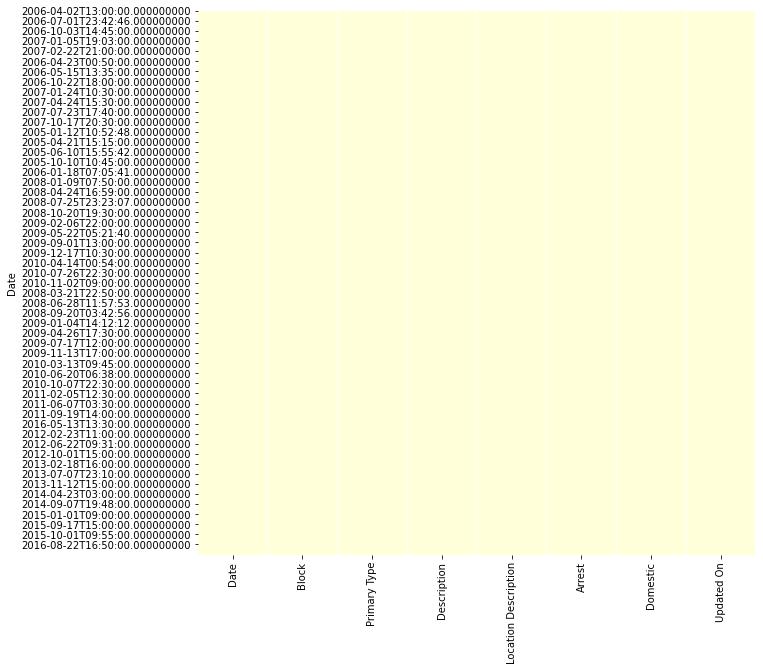

In [33]:
#to show the missing parta of dataset
plt.figure(figsize = (10, 10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [7]:
# to remove the column without useful data for analysis
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 
                 'X Coordinate', 'Y Coordinate', 'Year', 
                 'FBI Code', 'Beat', 'Ward', 'Community Area', 
                 'Location', 'District', 'Latitude', 'Longitude'], 
                 inplace = True, axis = 1)

In [35]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Updated On
Date,,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,04/15/2016 08:55:02 AM
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,04/15/2016 08:55:02 AM
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,04/15/2016 08:55:02 AM
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,04/15/2016 08:55:02 AM
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,04/15/2016 08:55:02 AM


In [8]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [9]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [10]:
# chicago_df.Date

In [36]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [12]:
#chicago_df['Primary Type'].value_counts().iloc[:15]

In [13]:
#order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

In [14]:
#plt.figure(figsize=(15,10))
#sns.countplot(y = 'Primary Type', data = chicago_df, order=order_data)

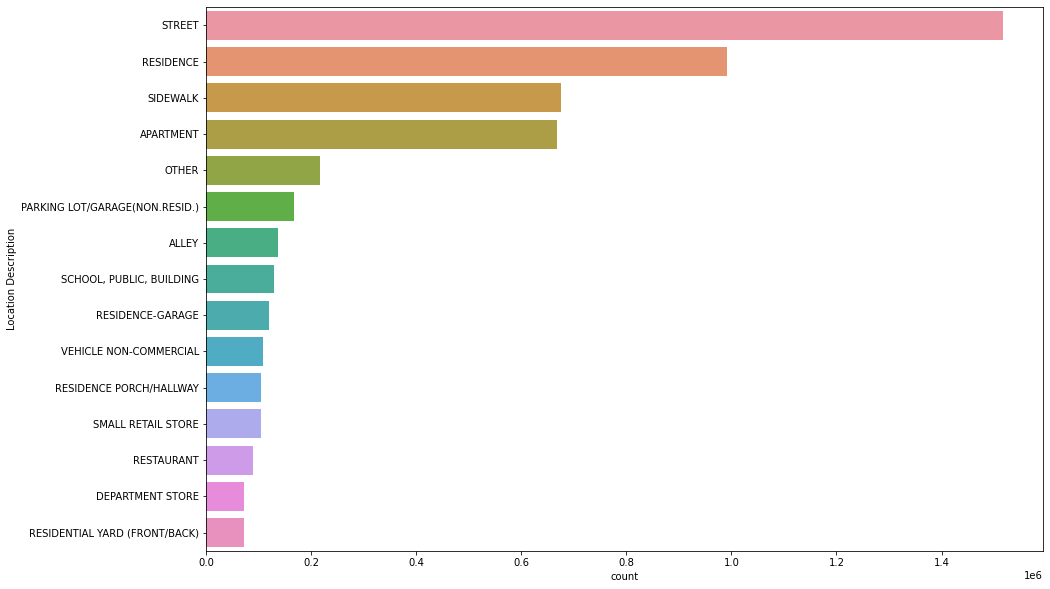

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Location Description', data = chicago_df,
            order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [16]:
#chicago_df.resample('Y').size()

Text(0, 0.5, 'Number of Crimes')

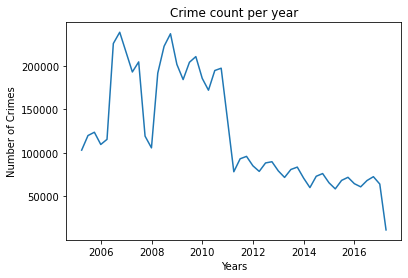

In [39]:
#plt.plot(chicago_df.resample('M').size())
#plt.plot(chicago_df.resample('Y').size())
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime count per year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Data Preparation

In [17]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [18]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [19]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date': 'ds', 
                                                             'Crime Count': 'y'})

Model

In [20]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [21]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future) 

In [25]:
#forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60379.720403,37009.553294,71798.118073,60379.720403,60379.720403,-4888.559945,-4888.559945,-4888.559945,-4888.559945,-4888.559945,-4888.559945,0.0,0.0,0.0,55491.160458
1,2005-02-28,60249.704311,33808.411669,68331.441574,60249.704311,60249.704311,-9556.480896,-9556.480896,-9556.480896,-9556.480896,-9556.480896,-9556.480896,0.0,0.0,0.0,50693.223415
2,2005-03-31,60105.757924,41259.588842,74835.875355,60105.757924,60105.757924,-1267.695327,-1267.695327,-1267.695327,-1267.695327,-1267.695327,-1267.695327,0.0,0.0,0.0,58838.062597
3,2005-04-30,59966.454969,44636.171599,77591.157646,59966.454969,59966.454969,1143.949615,1143.949615,1143.949615,1143.949615,1143.949615,1143.949615,0.0,0.0,0.0,61110.404583
4,2005-05-31,59822.508582,47906.548337,83549.740175,59822.508582,59822.508582,5464.443944,5464.443944,5464.443944,5464.443944,5464.443944,5464.443944,0.0,0.0,0.0,65286.952525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10040.415437,-11794.643788,23320.150341,9903.634190,10196.681598,-4019.723267,-4019.723267,-4019.723267,-4019.723267,-4019.723267,-4019.723267,0.0,0.0,0.0,6020.692171
506,2018-01-28,10027.195047,-11157.321190,22650.174623,9889.521340,10184.369288,-4201.000275,-4201.000275,-4201.000275,-4201.000275,-4201.000275,-4201.000275,0.0,0.0,0.0,5826.194771
507,2018-01-29,10013.974656,-11938.968444,22262.265631,9875.487106,10171.574910,-4397.189696,-4397.189696,-4397.189696,-4397.189696,-4397.189696,-4397.189696,0.0,0.0,0.0,5616.784959
508,2018-01-30,10000.754265,-12051.578577,22102.188213,9861.473882,10158.966354,-4607.406459,-4607.406459,-4607.406459,-4607.406459,-4607.406459,-4607.406459,0.0,0.0,0.0,5393.347806


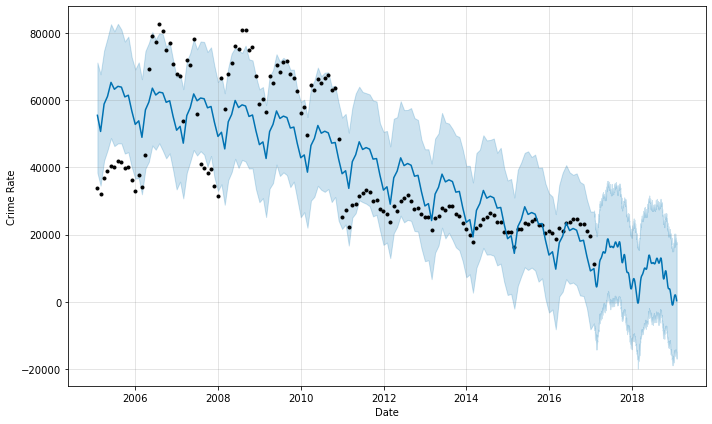

In [30]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

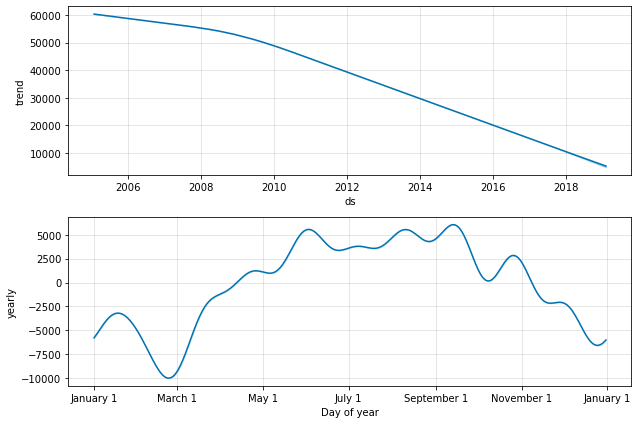

In [31]:
figure = m.plot_components(forecast)